Командная работа по выполнению задачи регрессии.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

1. EDA и Research анализ.

Загрузим данные в переменную data

In [3]:
data = pd.read_csv("dataset.csv")

In [4]:
d = pd.read_csv("dataset.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

Посмотрим содеражние датасета

In [5]:
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Удалим колонки "Unnamed: 0" и "track_id", так как они просто идентифицируют записи

In [6]:
data = data.drop(columns=["Unnamed: 0", "track_id"])

Проверим данные на наличие дубликатов

In [7]:
data.duplicated().sum()

577

Выходит, что есть 577 дубликатов. Удалим их.

In [8]:
data = data.drop_duplicates()

Узнаем типы данных признаков и количество записей

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113423 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113422 non-null  object 
 1   album_name        113422 non-null  object 
 2   track_name        113422 non-null  object 
 3   popularity        113423 non-null  int64  
 4   duration_ms       113423 non-null  int64  
 5   explicit          113423 non-null  bool   
 6   danceability      113423 non-null  float64
 7   energy            113423 non-null  float64
 8   key               113423 non-null  int64  
 9   loudness          113423 non-null  float64
 10  mode              113423 non-null  int64  
 11  speechiness       113423 non-null  float64
 12  acousticness      113423 non-null  float64
 13  instrumentalness  113423 non-null  float64
 14  liveness          113423 non-null  float64
 15  valence           113423 non-null  float64
 16  tempo             113423 

Определим количество пустых значений у каждого признака

In [10]:
data.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

Получается, что у трёх признаков есть по одному пустому значению. Выведем соответсвующие записи.

In [11]:
data[pd.isnull(data).any(axis=1)]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


Выяснилось, что все пустые значения принадлежат одной записи. Её смело можно удалить

In [12]:
data = data.dropna()

Посмотрим распределение популярности треков

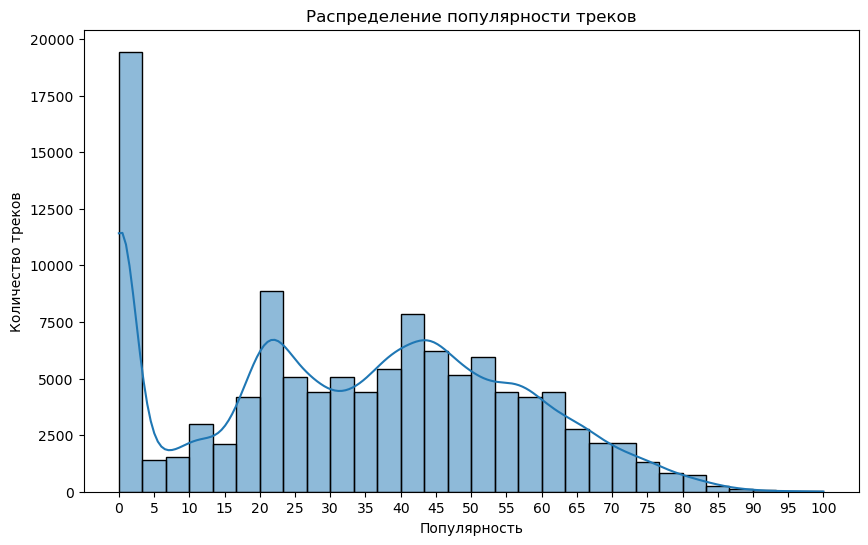

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data['popularity'], bins=30, kde=True)
plt.xlabel('Популярность')
plt.ylabel('Количество треков')
plt.title('Распределение популярности треков')
plt.xticks(range(0, 101, 5))
plt.show()

Вывод: 
По графику можно определить, что на Spotify есть множество треков, которые пренадлежат музыкантам любителям без аудитории.

Переведём длительность треков в минуты, чтобы уменьшить масштаб и улучшить читаемость

In [14]:
data["duration_ms"] = data["duration_ms"].apply(lambda ms: round(ms / 1000 / 60, 1))

In [15]:
data = data.rename(columns={"duration_ms" : "duration_min"})

Распределение длительности треков

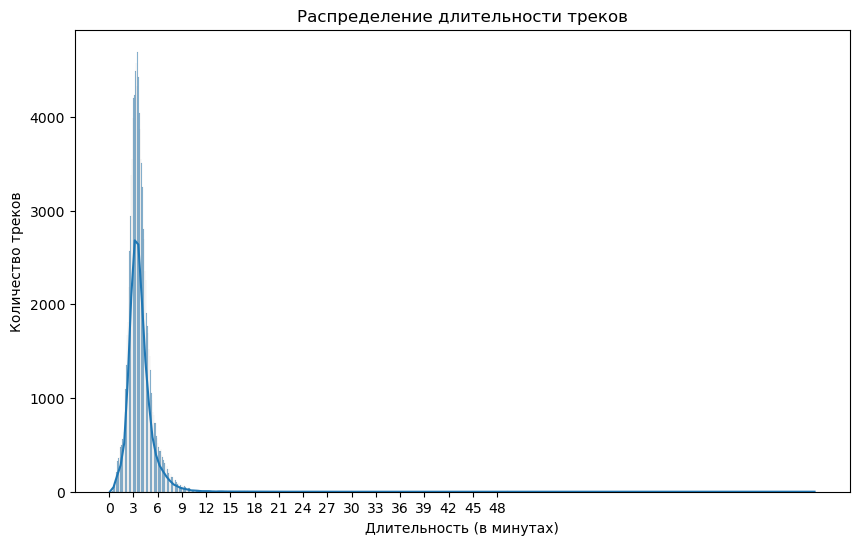

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['duration_min'], kde=True)
plt.title('Распределение длительности треков')
plt.xlabel('Длительность (в минутах)')
plt.xticks(range(0, 50, 3))
plt.ylabel('Количество треков')
plt.show()

Вывод: длительность большинства треков от 2 до 4 минут

Рассмотрим взаимосвязь между популярностью и танцевальностью

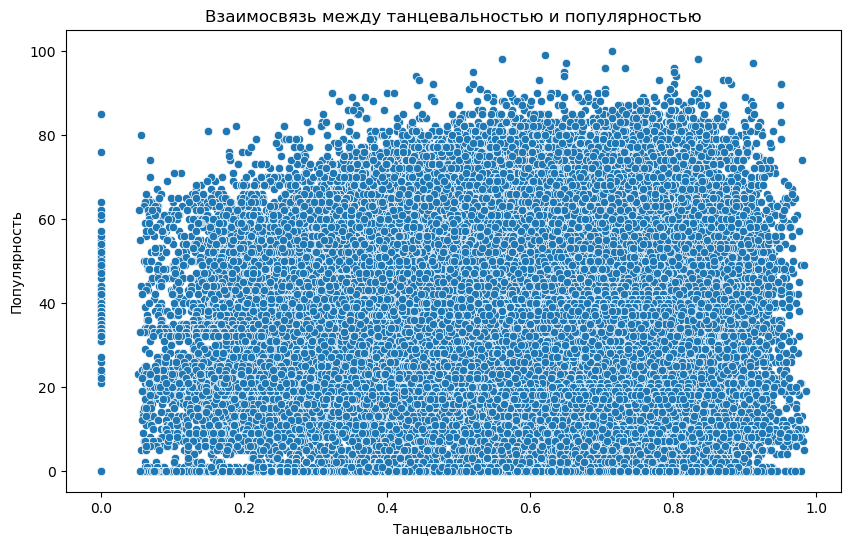

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=data)
plt.title('Взаимосвязь между танцевальностью и популярностью')
plt.xlabel('Танцевальность')
plt.ylabel('Популярность')
plt.show()

Вывод: какой-то интересной информации не получили

Посмотрим какие самые популярные жанры

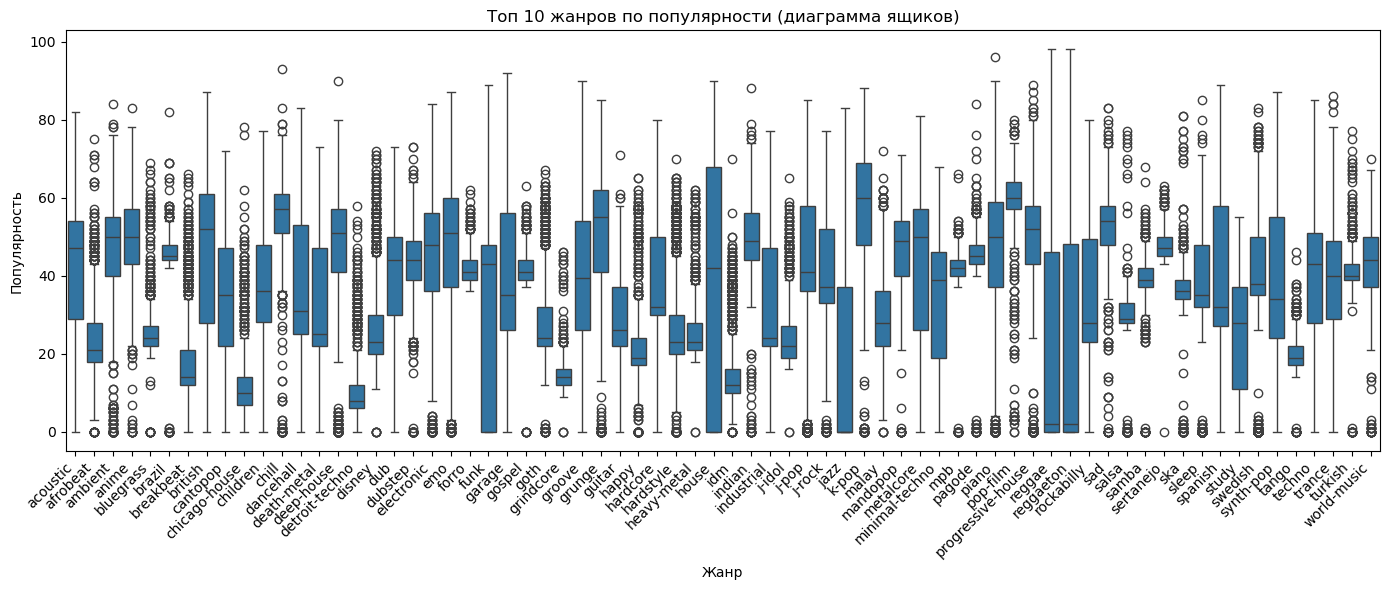

In [18]:
top_10_genres = data['track_genre'].value_counts().head(70).index

# Фильтрация данных для топ-10
top_10_data = data[data['track_genre'].isin(top_10_genres)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='track_genre', y='popularity', data=top_10_data)
plt.title('Топ 10 жанров по популярности (диаграмма ящиков)')
plt.xlabel('Жанр')
plt.ylabel('Популярность')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Вывод: K-pop и pop-film являются самыми популярными жанрами.

Взаимосвязь между ненормативной лексикой и популярностью

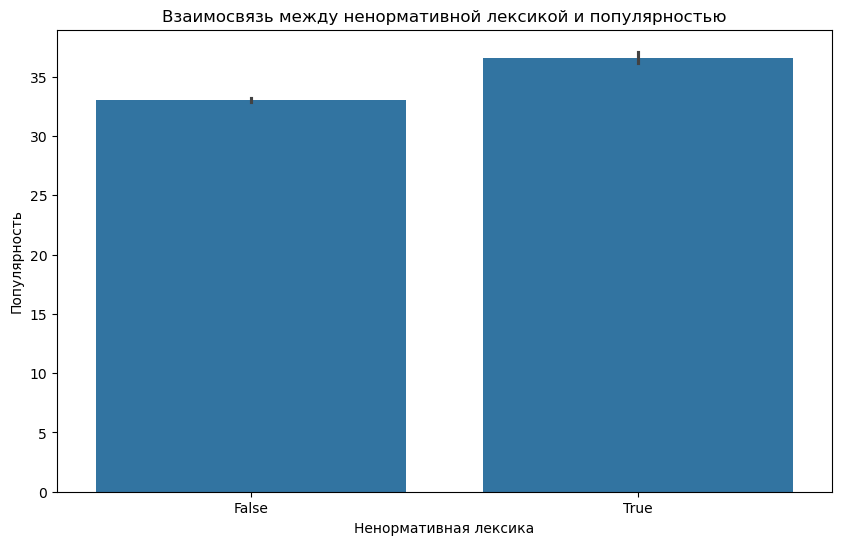

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='explicit', y='popularity', data=data)
plt.title('Взаимосвязь между ненормативной лексикой и популярностью')
plt.xlabel('Ненормативная лексика')
plt.ylabel('Популярность')
plt.show()

Вывод: Наличие ненормативной лексики особо не влияет на популярность

Выделим ктегориальные и числовые признаки

In [20]:
categorial_cols = data.select_dtypes(include=["object", "bool"]).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

Преобразуем все признаки к числовому типу данных

In [21]:
for col in categorial_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

In [22]:
data.head()

,artists,album_name,track_name,popularity,duration_min,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,10357,8100,11741,73,3.8,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,3287,14796,22528,55,2.5,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,12397,39162,60774,57,3.5,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,14839,8580,9580,71,3.4,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,5255,16899,25689,82,3.3,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


Определим корреляцию между признаками

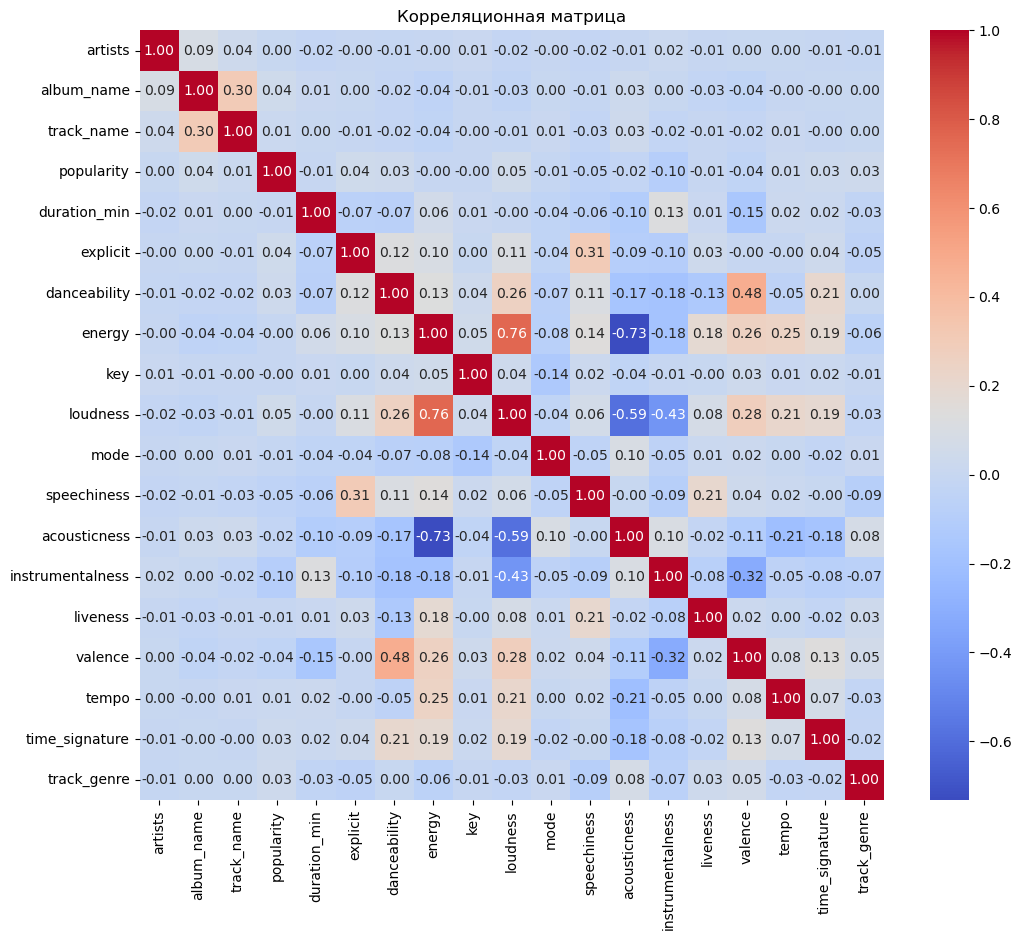

In [23]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Вывод:

Значение корреляции 0,76 между loudness и energy указывает на сильную положительную корреляцию. Это означает, что треки с более высокой громкостью имеют также высокую энергичность. 

Значение корреляции -0,73 между acousticness и energy показывает сильную отрицательную корреляцию. Это означает, что треки, которые имеют высокий уровень акустичности имеют более низкий уровень энергичности.

Значение корреляции 0,31 между speechiness и explicit подтверждает, что без слов в треке не будет ненормативной лексики.

Определение и удаление аномалий у признака 'loudness'

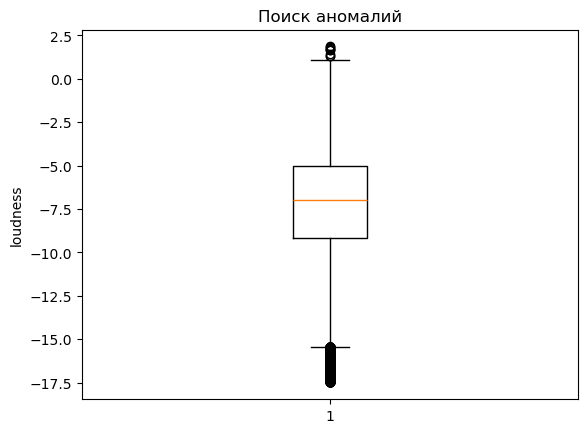

In [24]:
Q1 = data['loudness'].quantile(0.25)
Q3 = data['loudness'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Замена аномалий на медиану
median = data['loudness'].median()
data['loudness'] = data['loudness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data['loudness'])
plt.ylabel('loudness')
plt.title('Поиск аномалий')
plt.show()

Определение и удаление аномалий у признака 'speechiness'

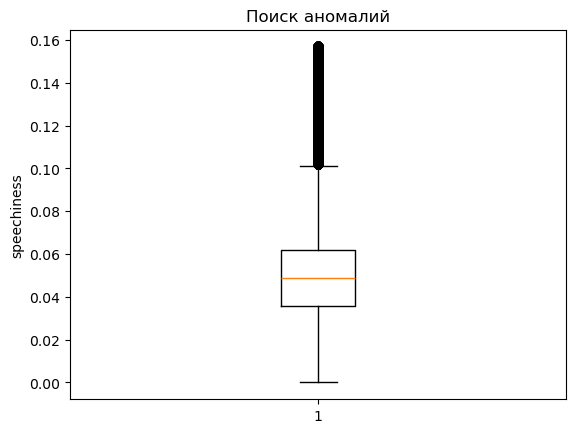

In [25]:
Q1 = data['speechiness'].quantile(0.25)
Q3 = data['speechiness'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = data['speechiness'].median()
data['speechiness'] = data['speechiness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data['speechiness'])
plt.ylabel('speechiness')
plt.title('Поиск аномалий')
plt.show()

Определение и удаление аномалий у признака 'instrumentalness'

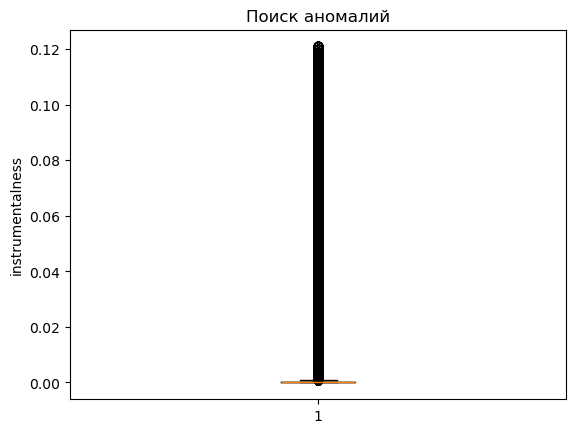

In [26]:
col = "instrumentalness"
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выбор данных без выбросов
data_filtered = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

plt.boxplot(data_filtered[col])
plt.ylabel('instrumentalness')
plt.title('Поиск аномалий')
plt.show()

Проанализировав график можно сказать, что у этого признака очень много аномалий. Так как "acousticness" и "instrumentalness" предполагают использование музыкальных инструментов, то эти признаки схожи. Также корреляция "instrumentalness" с другими колонками мала. 

Объединяя все эти нюансы, можно сделать вывод, что признак "instrumentalness" можно удалить.

In [27]:
data = data.drop('instrumentalness', axis=1)
numerical_features = numerical_features.drop('instrumentalness')

Определение и удаление аномалий у признака 'liveness'

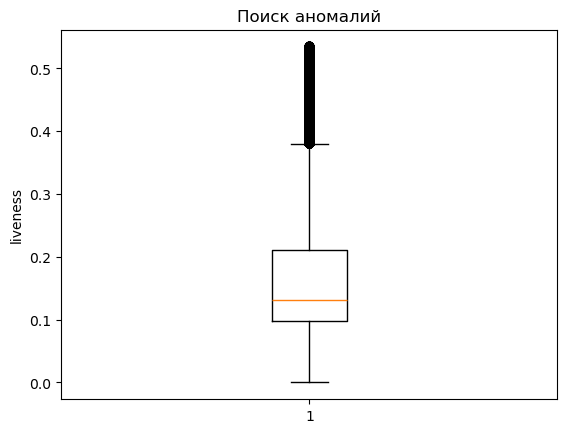

In [28]:
col = "liveness"
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = data['liveness'].median()
data['liveness'] = data['liveness'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data[col])
plt.ylabel('liveness')
plt.title('Поиск аномалий')
plt.show()

Определение и удаление аномалий у признака 'tempo'

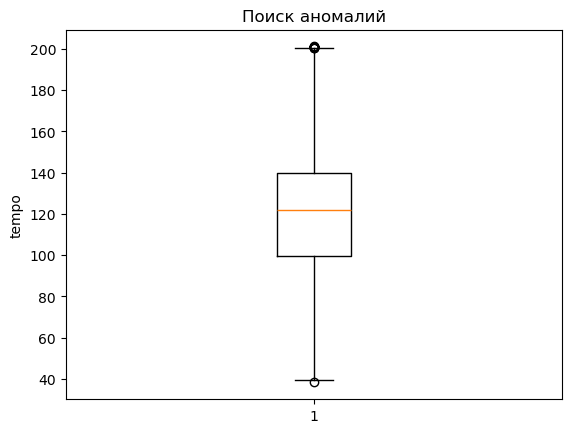

In [29]:
col = "tempo"
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

median = data['tempo'].median()
data['tempo'] = data['tempo'].apply(lambda x: median if (x < lower_bound or x > upper_bound) else x)

plt.boxplot(data[col])
plt.ylabel('tempo')
plt.title('Поиск аномалий')
plt.show()

2. Feature Engineering, Feature Importances и простая модель

Приведем числовые признаки к единому масштабу

In [30]:
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

Создадим новый признак, который будет представлять собой произведение tempo и energy. Он может показать, насколько "живым" является трек с учетом его ритма и энергии.

In [31]:
data['energy_tempo'] = data['energy'] * data['tempo']

In [32]:
correlation = data.corr()
correlation_target = correlation['popularity'].sort_values(ascending=False)
correlation_target

popularity        1.000000
explicit          0.044543
album_name        0.041912
danceability      0.033795
track_genre       0.032763
time_signature    0.030580
loudness          0.028320
tempo             0.015478
track_name        0.013192
artists           0.004919
energy           -0.002976
key              -0.004077
duration_min     -0.008248
mode             -0.014434
liveness         -0.016302
acousticness     -0.022415
energy_tempo     -0.035344
valence          -0.041328
speechiness      -0.047694
Name: popularity, dtype: float64

Feature Importances

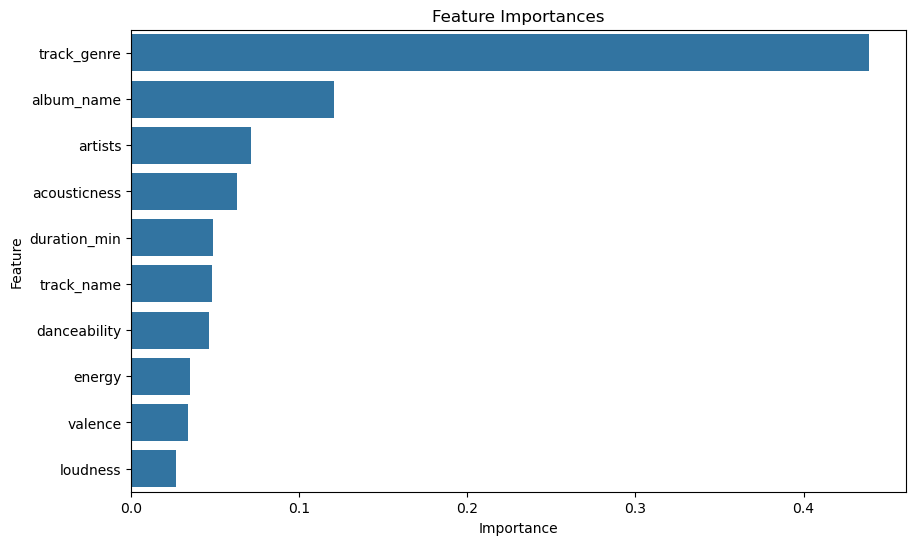

In [33]:
from sklearn.ensemble import RandomForestRegressor

# 1. Выделяем признаки и целевую переменную
X = data.drop(columns=['popularity'])  
y = data['popularity']  

# 2. Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Построение модели RandomForest
model = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# 4. Оценка важности признаков
importances = model.feature_importances_
feature_names = X.columns  # Получаем имена признаков

# 5. Создание DataFrame для важности признаков
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 6. Сортировка по важности
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 7. Визуализация важности признаков
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Feature Importances')
plt.show()


Простая модель

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

# Оценка качества модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nОценка модели:")
print(f"MAE (Mean Absolute Error): {mae:.2f}") # Средняя абсолютная ошибка
print(f"MSE (Mean Squared Error): {mse:.2f}") # Средняя квадратная ошибка
print(f"R^2 (R-squared): {r2:.2f}") # Коэффициент детерминации, который указывает, насколько хорошо модель объясняет изменчивость целевой переменной.



Оценка модели:
MAE (Mean Absolute Error): 0.66
MSE (Mean Squared Error): 0.72
R^2 (R-squared): 0.29


## 3. Линейные, деревья, модификации градиентного бустинга , нейронные сети.

#### Линейная модель

In [35]:
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [36]:
# Удаление ненужных столбцов
columns_to_drop = ['artists', 'album_name', 'track_name']
data_cleaned = data.drop(columns=columns_to_drop)

# Кодирование категориальных переменных
label_encoders = {}
for col in ['track_genre', 'explicit']:
    le = LabelEncoder()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    label_encoders[col] = le

# Выделение признаков и целевой переменной
X = data_cleaned.drop(columns=['popularity'])
y = data_cleaned['popularity']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Размеры тренировочного и тестового набора данных
X_train.shape, X_test.shape

((90737, 15), (22685, 15))

In [37]:
# Обучение модели на наших обучающих данных
model = LinearRegression()
model.fit(X_train, y_train)

# Коэффициенты модели
pd.DataFrame(model.coef_, X.columns, columns = ['Coeff'])

,Coeff
duration_min,-0.011548
explicit,0.152121
danceability,0.053925
energy,-0.046879
key,-0.002376
loudness,0.056345
mode,-0.009348
speechiness,-0.061682
acousticness,-0.027944
liveness,-0.005736


In [38]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.01664875041567626
0.014208111059960005


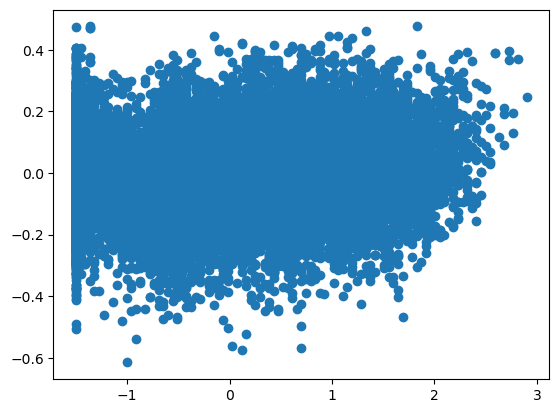

In [39]:
# Построение двух массивов на точечной диаграмме
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)

In [40]:
# кросс-валидация
scores = cross_val_score(model, X_train, y_train, cv=5)
scores.mean()

0.016149873848915218

#### Деревья решений

In [41]:
max_depth_values = range(1, 100)

scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    reg = tree.DecisionTreeRegressor(max_depth=max_depth)
    reg.fit(X_train, y_train)
    train_score = reg.score(X_train, y_train)
    test_score = reg.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(reg, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 
                                    'train_score': [train_score], 
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

scores_data.head(10)

,max_depth,train_score,test_score,cross_val_score
0,1,0.006431,0.006872,0.005627
0,2,0.019057,0.018108,0.019266
0,3,0.042017,0.042036,0.042873
0,4,0.071011,0.070635,0.073410
0,5,0.086707,0.082933,0.087821
0,6,0.113773,0.104361,0.108488
0,7,0.134893,0.119076,0.124250
0,8,0.164009,0.140045,0.143640
0,9,0.196911,0.163456,0.162956
0,10,0.231939,0.177128,0.179699


<Axes: xlabel='max_depth', ylabel='score'>

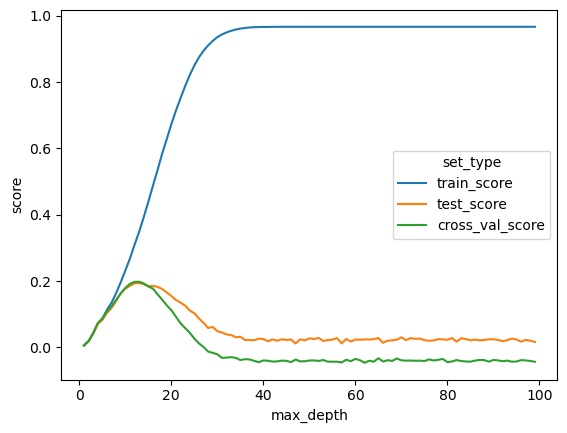

In [42]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')

sns.lineplot(x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)

In [43]:
#смотрим лучший результат и его глубину дерева
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.005627
199,2,cross_val_score,0.019266
200,3,cross_val_score,0.042873
201,4,cross_val_score,0.073410
202,5,cross_val_score,0.087821
203,6,cross_val_score,0.108488
204,7,cross_val_score,0.124250
205,8,cross_val_score,0.143640
206,9,cross_val_score,0.162956
207,10,cross_val_score,0.179699


#### Градиентный бустинг

In [44]:
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split, KFold
import numpy as np

In [45]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
score = []

for train_ix, test_ix in kf.split(X_train):
    # Разделение обучающей выборки на train/test в текущей итерации
    X_train_kf, X_test_kf = X_train.iloc[train_ix], X_train.iloc[test_ix]
    y_train_kf, y_test_kf = y_train.iloc[train_ix], y_train.iloc[test_ix]

    # Обучение модели
    model = XGBRegressor(max_depth=8, n_estimators=200, learning_rate=0.1)
    model.fit(X_train_kf, y_train_kf)

    # Прогноз и расчет метрики
    y_pred_kf = model.predict(X_test_kf)
    scr = explained_variance_score(y_true=y_test_kf, y_pred=y_pred_kf)
    score.append(scr)

# Итоговый результат
np.mean(score)

0.4421562511271707

#### Нейронные сети

In [46]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import explained_variance_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

In [47]:
# Нормализация данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Кросс-валидация с 5 фолдами
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_scores = []

# Построение и обучение модели в каждом фолде
for train_index, val_index in kf.split(X_train_scaled):
    X_fold_train, X_fold_val = X_train_scaled[train_index], X_train_scaled[val_index]
    y_fold_train, y_fold_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Создание модели
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_fold_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError())

    # Обучение модели
    model.fit(X_fold_train, y_fold_train, epochs=20, verbose=0, batch_size=16)

    # Предсказания на валидационных данных
    y_pred = model.predict(X_fold_val, verbose=0)

    # Оценка R² (или отрицательная MSE для score)
    score = r2_score(y_fold_val, y_pred)  # Для R²
    # score = -np.mean((y_fold_val - y_pred.flatten())**2)  # Для отрицательной MSE
    fold_scores.append(score)

# Итоговый вывод
mean_score = np.mean(fold_scores)

# Финальное обучение модели на всех обучающих данных
final_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
final_model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError())

final_model.fit(X_train_scaled, y_train, epochs=20, verbose=0, batch_size=16)

# Тестирование финальной модели
y_test_pred = final_model.predict(X_test_scaled, verbose=0)
final_score = r2_score(y_test, y_test_pred)

print("Средний score по фолдам:", mean_score)
print("Score по каждому фолду:", fold_scores)

print("Итоговый score", final_score)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs

Средний score по фолдам: 0.08387768960197424
Score по каждому фолду: [0.06989817087136307, 0.08182385666685776, 0.0852354601819495, 0.09271608497938988, 0.08971487531031097]
Итоговый score 0.07084683335518582


- Линейная модель score: 0.017211978652203565
- Дерево решений score: 0.234403
- Градиентный бустинг score: 0.4522052118507494
- Нейронные сети score: 0.12775686136919384

### Итоговый вывод:
- Градиентный бустинг показывает наилучший score (0.4522), что делает его предпочтительным методом для предсказания популярности в данном наборе данных.
- Линейная модель оказалась наименее эффективной, что подтверждает наличие нелинейных зависимостей в данных.